In [3]:
library(biomaRt)
library(dplyr)
library(readr)
library(readxl)
library(venn)
library(ggplot2)
library(sf)
library(ggVennDiagram)


Attaching package: ‘dplyr’


The following object is masked from ‘package:biomaRt’:

    select


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Linking to GEOS 3.13.0, GDAL 3.10.0, PROJ 9.5.1; sf_use_s2() is TRUE



In [4]:
humanlist <- c("acp2","calsyntenin-1","calsyntenin-2","calsyntenin-3","aplp1","aplp2","app","axl","bcma","betacellulin","betaglycan","car","cd147","cd200","cd43","cd44","cd99","cx3cl1","cxcl16","desmoglein-2","dner","dr6","dystroglycan","e-cadherin","epcam","epha2","epha5","epha7","ephb3","ephb4","ephb6","ephrin-b2","erbb4","f11r","fgfr4","glg1","hla-a2","ifnar2","igf-1r","il11r","il-1r1","il-1r2","il6r","ir","irela","ilrelb","jagged2","kcne2","kcne1","klotho","lar","ldlr","lrp1","lrp1b","lrp6","mer","met","muc1","musk","n-cadherin","neogenin","neurexin-3-b","NLRR3","p75NTR","pianp","plxdc2","pmel17","pdpn","polycystin-1","polyductin","protocadherin-12","ptk7","rage","robo1","sez6","sez6l","sez6l2","sirpa","sorcs1","sorla","sortilin","synedecan-1","synedecan-2","synedecan-3","tie1","tmeff2","tnfr1","trem2","trka","tyro3","vasorin","vegfr3")

In [5]:
mouselist <- c("apoER2","CACHD1","CADM1","CSF1R","Delta1","dscam","dscaml1","ephb2","ephrin-b2","fgfr3","ghr","l1","nectin1a","nectin3","ng2","notch1","notch2","notch3","notch4","nprc","nradd","pianp","prima","pvrl2","sez6","tkrB","trop2","tyrp1","tyrp2","vgscb1","vgscb2","vgscb3","vgscb4","vldlr")

In [6]:
mouse_mart <- useEnsembl("ensembl", dataset = "mmusculus_gene_ensembl")

In [7]:
# Get UniProt IDs for these proteins
uniprot_mouse <- getBM(attributes = c("uniprotswissprot", "mgi_symbol"),
                      filters = "external_gene_name",
                      values = mouselist,
                      mart = mouse_mart)


In [8]:
mouse_ids <- uniprot_mouse$uniprotswissprot

In [9]:
uniprot_mouse <- getBM(attributes = c("uniprotswissprot", "mgi_symbol"),
                      filters = "uniprotswissprot",
                      values = mouse_ids,
                      mart = mouse_mart)


In [10]:
mouse_genes <- uniprot_mouse$mgi_symbol

In [11]:
mapping <- read.delim("HMD_HumanPhenotype.rpt", header = FALSE)

In [12]:
colnames(mapping) <- c("Human_Gene","hum_num", "Mouse_Gene", "Mouse_MGI_ID", "HPO_Term","last")

In [13]:
result <- mapping %>%
  filter(Mouse_Gene %in% mouse_genes) %>%
  select(Mouse_Gene, Human_Gene)

In [14]:
converted_mouse <- result$Human_Gene

In [15]:
ensembl <- useEnsembl("ensembl", dataset = "hsapiens_gene_ensembl")


In [16]:
# Fetches hgnc_symbol and unirpot ID
results_hum <- getBM(
  attributes = c("hgnc_symbol","uniprotswissprot"), # Attributes: UniProt ID and Gene Symbol
  filters = "hgnc_symbol",                      # Filter by UniProt IDs
  values = humanlist,                                 # Input your list of UniProt IDs
  mart = ensembl                                      # Use the Ensembl mart connection
)

In [17]:
human_genes <- results_hum$hgnc_symbol

In [18]:
human_genes <-c(human_genes,mouse_genes)

In [19]:
# Retriving module 1 from mic-3 since its the only microglia cell state that assigned PSEN1 to a module

In [20]:
modules <- read.csv("microglia_moduleTables/microstate3_modules.csv")
modules <- subset(modules, module == "micro1")

In [21]:
# Extracting the genes assigned to the same module PSEN1 is in

In [22]:
module_genes <- modules$gene_name

In [23]:
module_genes

[1] "AL669831.5"      "INTS11"          "SLC35E2B"        "SLC35E2A"       
   [5] "NADK"            "CFAP74"          "MORN1"           "TNFRSF14"       
   [9] "CEP104"          "KCNAB2"          "RERE"            "H6PD"           
  [13] "PIK3CD"          "CLSTN1"          "UBE4B"           "KIF1B"          
  [17] "PGD"             "AGTRAP"          "MTHFR"           "VPS13D"         
  [21] "DHRS3"           "KAZN"            "TMEM51"          "EFHD2"          
  [25] "DNAJC16"         "DDI2"            "FBXO42"          "PADI2"          
  [29] "RCC2"            "IGSF21"          "UBR4"            "CAPZB"          
  [33] "USP48"           "KDM1A"           "AL031428.1"      "HMGCL"          
  [37] "MACO1"           "ARID1A"          "WDTC1"           "WASF2"          
  [41] "THEMIS2"         "RPA2"            "RCC1"            "TRNAU1AP"       
  [45] "SNHG12"          "LAPTM5"          "ZCCHC17"         "BSDC1"          
  [49] "ZBTB8OS"         "S100PBP"         "PHC2"            "ZMYM4"          
  [53] "KIAA0319L"       "AGO1"            "AL139260.1"      "MACF1"          
  [57] "PABPC4"          "PPIE"            "TRIT1"           "CAP1"           
  [61] "SMAP2"           "P3H1"            "RNF220"          "TESK2"          
  [65] "GPBP1L1"         "ATPAF1"          "CMPK1"           "FAF1"           
  [69] "EPS15"           "OSBPL9"          "BTF3L4"          "CC2D1B"         
  [73] "TUT4"            "SHISAL2A"        "ACOT11"          "USP24"          
  [77] "FGGY"            "NFIA"            "TM2D1"           "DOCK7"          
  [81] "ATG4C"           "PGM1"            "SRSF11"          "ST6GALNAC3"     
  [85] "USP33"           "IFI44"           "TTLL7"           "PRKACB"         
  [89] "CTBS"            "ODF2L"           "LMO4"            "PKN2"           
  [93] "GBP2"            "LRRC8C-DT"       "RPAP2"           "EVI5"           
  [97] "FAM69A"          "CCDC18"          "DR1"             "FNBP1L"         
 [101] "BCAR3"           "DPYD"            "AGL"             "CDC14A"         
 [105] "AC093157.1"      "RNPC3"           "STXBP3"          "WDR47"          
 [109] "PSRC1"           "SORT1"           "AMPD2"           "GSTM4"          
 [113] "GSTM3"           "AHCYL1"          "C1orf162"        "TMIGD3"         
 [117] "RAP1A"           "CTTNBP2NL"       "WNT2B"           "AL390729.1"     
 [121] "SLC16A1-AS1"     "LRIG2"           "PHTF1"           "RSBN1"          
 [125] "HIPK1"           "TRIM33"          "GDAP2"           "NBPF26"         
 [129] "LINC00623"       "AC244453.3"      "SRGAP2C"         "AC244021.1"     
 [133] "NBPF15"          "SRGAP2B"         "RNF115"          "LIX1L"          
 [137] "TXNIP"           "NBPF12"          "PRKAB2"          "ACP6"           
 [141] "NBPF14"          "NBPF9"           "AC245297.3"      "NBPF19"         
 [145] "HIST2H2BE"       "VPS45"           "PLEKHO1"         "PRPF3"          
 [149] "RPRD2"           "MCL1"            "ENSA"            "ARNT"           
 [153] "PI4KB"           "RFX5"            "SNX27"           "GATAD2B"        
 [157] "CRTC2"           "IL6R"            "MEF2D"           "HDGF"           
 [161] "SLAMF8"          "DCAF8"           "F11R"            "USF1"           
 [165] "ATF6"            "OLFML2B"         "NOS1AP"          "PBX1"           
 [169] "POU2F1"          "CREG1"           "RCSD1"           "MPZL1"          
 [173] "DCAF6"           "SFT2D2"          "TBX19"           "VAMP4"          
 [177] "AL645568.1"      "DARS2"           "ZBTB37"          "RC3H1"          
 [181] "RABGAP1L"        "KIAA0040"        "COP1"            "RASAL2"         
 [185] "RALGPS2"         "SOAT1"           "CEP350"          "XPR1"           
 [189] "STX6"            "NPL"             "TSEN15"          "EDEM3"          
 [193] "TRMT1L"          "SWT1"            "PLA2G4A"         "ERVMER61-1"     
 [197] "RGS18"           "AL390957.1"      "RGS1"            "DENND1B"        
 [201] "NEK7"            "PTPRC"           "MIR181A1H

In [24]:
ad_genes <- read_excel("AD_genes.xlsx", col_names = FALSE)

New names:
• `` -> `...1`


In [25]:
ad_genes <- ad_genes$"...1"

In [26]:
gene_sets <- list(
  "AD Genes" = ad_genes,
  "Module Genes" = module_genes,
  "PSEN1 substrates" = human_genes
)


In [27]:
# Create Venn Diagram with custom colors
venn <- ggVennDiagram(
  gene_sets,
  label = "both" # Show both counts and genes
) +
  # Adjust fill colors for better contrast
  scale_fill_gradient(low = "grey", high = "lightblue") +
  # Adjust outline colors for clarity
  scale_color_manual(values = c("black", "black", "black")) +
  # Tweak theme for visibility
  theme(
    legend.position = "none", # Remove legend
    panel.background = element_rect(fill = "white"), # White background
    plot.background = element_rect(fill = "white")  # White plot background
  )

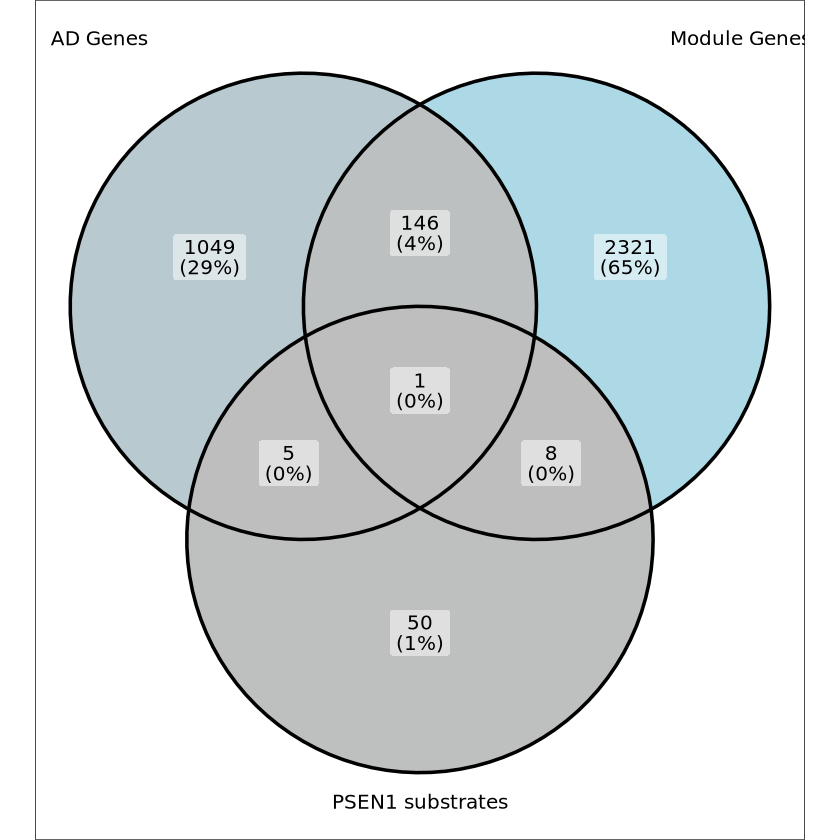

In [28]:
venn

In [29]:
ggvenn_result <- ggVennDiagram(gene_sets)



In [30]:
ggvenn_result$data

list()
attr(,"class")
[1] "waiver"

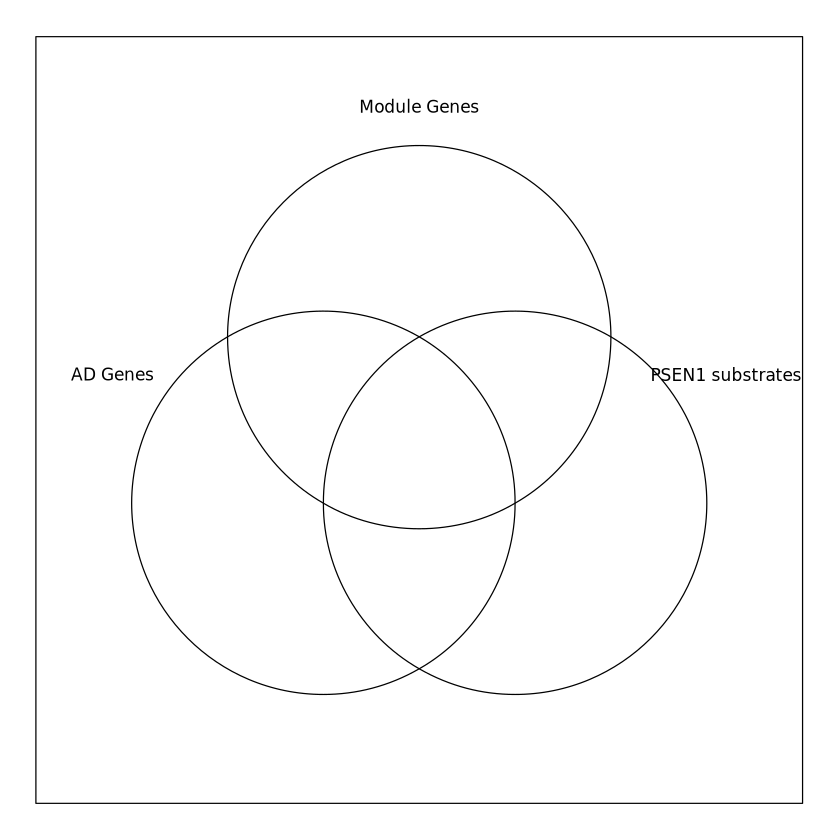

In [31]:
venn_result <- venn(gene_sets)

In [32]:
venn_result

,AD Genes,Module Genes,PSEN1 substrates,counts
,<int>,<int>,<int>,<int>
,0,0,0,0
PSEN1 substrates,0,0,1,50
Module Genes,0,1,0,2321
Module Genes:PSEN1 substrates,0,1,1,8
AD Genes,1,0,0,1049
AD Genes:PSEN1 substrates,1,0,1,5
AD Genes:Module Genes,1,1,0,146
AD Genes:Module Genes:PSEN1 substrates,1,1,1,1


$`PSEN1 substrates`
 [1] "LRP6"    "KCNE1"   "IFNAR2"  "KCNE2"   "CX3CL1"  "LRP1B"   "LRP1"   
 [8] "TMEFF2"  "PTK7"    "SIRPA"   "MUSK"    "SEZ6L"   "EPHA5"   "FGFR4"  
[15] "EPHA7"   "PIANP"   "SEZ6"    "TYRO3"   "MET"     "CD44"    "ROBO1"  
[22] "PDPN"    "APLP2"   "EPCAM"   "LDLR"    "MUC1"    "ERBB4"   "APLP1"  
[29] "EPHB3"   "DNER"    "CD200"   "TIE1"    "EPHA2"   "Notch2"  "Tyrp1"  
[36] "Csf1r"   "Ghr"     "Notch4"  "Ephb2"   "Vldlr"   "Notch1"  "Dscaml1"
[43] "Notch3"  "Pianp"   "Cachd1"  "Sez6"    "Nradd"   "Cadm1"   "Dscam"  
[50] "Nectin3"

$`Module Genes`
   [1] "AL669831.5"      "INTS11"          "SLC35E2B"        "SLC35E2A"       
   [5] "NADK"            "CFAP74"          "MORN1"           "TNFRSF14"       
   [9] "CEP104"          "KCNAB2"          "RERE"            "H6PD"           
  [13] "PIK3CD"          "CLSTN1"          "UBE4B"           "KIF1B"          
  [17] "PGD"             "AGTRAP"          "MTHFR"           "VPS13D"         
  [21] "DHRS3"           "KA

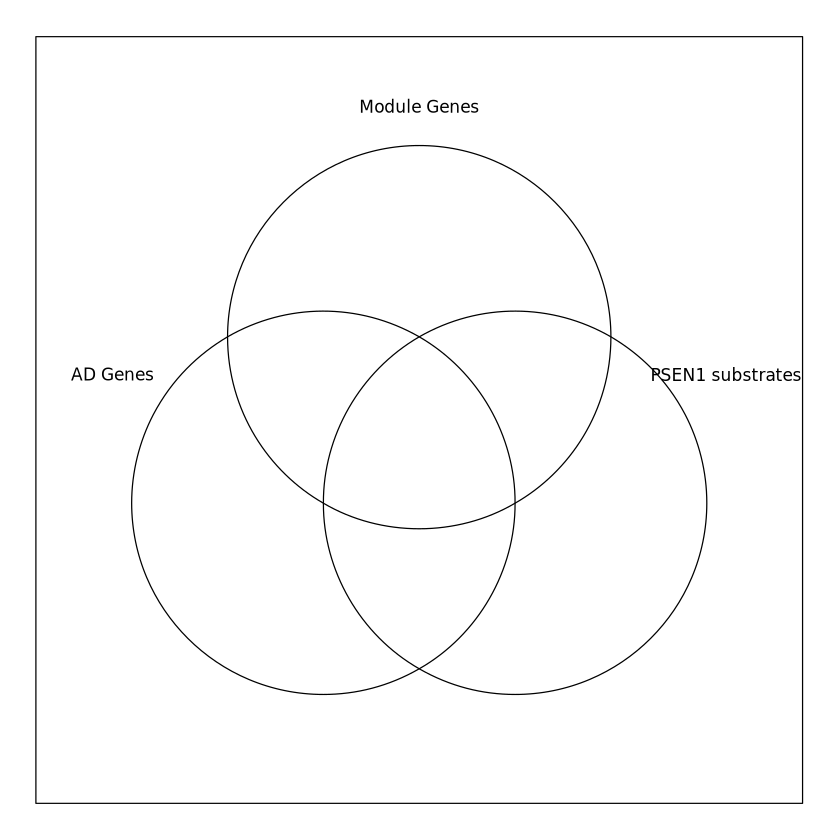

In [33]:
venn_obj <- venn(gene_sets)

# Extract intersection genes
intersection_genes <- attr(venn_obj, "intersections")
print(intersection_genes)

In [34]:
# Direct computation of intersections
all_three <- Reduce(intersect, gene_sets)
print(all_three)

[1] "ACP2"


In [38]:
ad_module <- intersect(module_genes,human_genes)
print(ad_module)

[1] "IL6R"   "F11R"   "CD99"   "ACP2"   "PLXDC2" "SORCS1" "GLG1"   "CXCL16"
[9] "AXL"   
